In [1]:
import cmath
import math
import re
import json
import os.path
import ast
from os import path
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [125]:

def proccessdocs(words):
    symbolssp=['.','\n',',',';',':']
    symbols=['|','-','(',')','_','_','?-',"'",'(', ')','?-','.','"','?','$','--','-','”','`','~','×','—','“','\\','+','<','>','/','[',']','{','}','!','#','@','$','%','^','&','1','2','3','4','5','6','7','8','9','0','=','–']
    # words = words.replace('\n\n', ' ')
    for s in symbolssp:
        words=words.replace(s,' ')
    for s in symbols:
        if s not in symbolssp:
            words=words.replace(s,'')
    # |} | { | [ |] | \ | / | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0 |  # |%|^|&|!|@
    words = re.split('\s|;|,|\*|:', words)

    return  words
data=[]
label=[]
vocab=[]
def preprocess():

    s = open("/content/drive/MyDrive/lab1/Stopword-List.txt")
    stopwords = s.read()
    stopwords = stopwords.lower()
    stopwords = stopwords.split("\n")
    print(stopwords)


    n=449
    lem=WordNetLemmatizer()
   
    for doc in range(1, 231):
        f = open("/content/drive/MyDrive/course/" + str(doc) + ".txt", "r")
        words = f.read()
        words = proccessdocs(words)
        n_word=len(words)
        temp=''
        for w in words:
            if w == '':
                continue
            w = w.lower()
            if str(w) not in stopwords:
                lem_w=lem.lemmatize(w)
                temp+=lem_w+' '
                if lem_w not in vocab:
                  vocab.append(lem_w)
                
        data.append(temp)
        label.append("course")
    for doc in range(1, 822):
        print(doc)
        f = open("/content/drive/MyDrive/non-course/" + str(doc) + ".txt", "r")
        words = f.read()
        words = proccessdocs(words)
        n_word=len(words)
        temp=''
        for w in words:
            if w == '':
                continue
            w = w.lower()
            if str(w) not in stopwords:
              lem_w=lem.lemmatize(w)
              temp+=lem_w+' '
              if lem_w not in vocab:
                  vocab.append(lem_w)
                
        data.append(temp)
        label.append("non-course")


In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [29]:
data[0]

'c home page c system programming operating system c practicum operating system kenneth p birman c news group course syllabus lecture note unix filesystem structure linking static dynamic assignment homework homework homework homework homework assignment solution solution solution solution solution prelim solution ta lili upson hall phone e mail lilics cornell edu office hour wednesday friday yi cheng huang upson hall phone e mail ychuangcs cornell edu office hour tuesday thursday mihai budiu upson hall phone e mail budiucs cornell edu office hour wednesday thursday last modified tue nov '

In [126]:
preprocess()

['\ufeffa', 'is ', 'the', 'of ', 'all', 'and', 'to', 'can', 'be', 'as', 'once ', 'for', 'at', 'am', 'are', 'has', 'have', 'had', 'up', 'his', 'her', 'in', 'on', 'no', 'we', 'do', 'with', 'my', 'to', 'there', 'this', 'that', 'our', 'of', 'a', 'is', 'from', 'or']
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
21

In [127]:
print(len(vocab))

17313


In [173]:
import pandas as pd 
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(data)
tfidf_d=[]
for i in range(0,tfidf_vectorizer_vectors.shape[0]):
  first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[i]  
  df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
  df=df.sort_values(by=["tfidf"],ascending=False)
  df1=df.head(100)
  tfidf_d.append(df1)
frame=pd.concat(tfidf_d)
frame=frame.sort_values(by=["tfidf"],ascending=False)
frame=frame.head(100)
tfidf_d=list(frame.index)
frame

,tfidf
hani,0.962488
irelandcs,0.922375
felixs,0.909816
jovans,0.878056
rongbigfoot,0.860835
...,...
rep,0.610356
nick,0.609634
zhongbin,0.607951
dans,0.602013


In [51]:
label

['course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',
 'course',

In [174]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
en_label=label_encoder.fit_transform(label)
end=[]
cnt1=0
for lines in data:
  temp=[]
  tokenized = nltk.word_tokenize(lines)
  for v in tfidf_d:
    if v in tokenized:
      temp.append(1)
    else:
      temp.append(0)
  end.append(temp)
  cnt1+=1
X_train, X_test, y_train, y_test = train_test_split(end, en_label, test_size=0.3,random_state=109)


In [175]:
len(X_train[0])

100

In [221]:
from sklearn.naive_bayes import  BernoulliNB

#Create a Classifier
model =  BernoulliNB()

# Train the model using the training sets
model.fit(X_train,y_train)

BernoulliNB()

In [223]:
import pickle
filename = '/content/drive/MyDrive/IR_A3_m/bbn.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
import pickle
filename = '/content/drive/MyDrive/IR_A3_m/bbn.sav'
loaded_model = pickle.load(open(filename, 'rb'))

Accuracy: 0.9208860759493671
F1: 0.9527410207939508
Precision: 0.9197080291970803
Recall: 0.9882352941176471


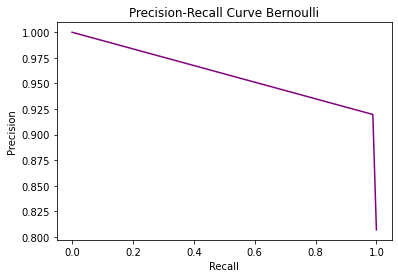

In [222]:
y_pred=model.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
precision, recall, thresholds=metrics.precision_recall_curve(y_test,y_pred)


#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve Bernoulli')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [224]:
import re
def search(text,non1,nouns):
    left=""
    right=""
    l=[]
    i=0
    for t in text:
      if non1==t:
        
          if i>0:
            if text[i-1] not in nouns:
              left=text[i-1]
          if i<len(text)-1:
            if text[i+1] not in nouns:
              right=text[i+1]
      i+=1   
        
    return left,right

In [225]:
from collections import Counter
n_data=[]
oc_noun=[]
oc_word=[]
for lines in data:
  tokenized = nltk.word_tokenize(lines)

  for (word, pos) in nltk.pos_tag(tokenized):
     if(pos[:2] == 'NN'):
       oc_noun.append(word)
       
counter=Counter(oc_noun)

most_occur = counter.most_common(50)
oc_noun.clear()
  
for m in most_occur:
    oc_noun.append(m[0])
print(most_occur)
for lines in data:
  tokenized=nltk.word_tokenize(lines)
  for o in oc_noun:
    le,r=search(tokenized,o,oc_noun)
    if len(le)>0:
        oc_word.append(le)
    if len(r)>0:
        oc_word.append(r)
counter1=Counter(oc_word)

most_occur1 = counter1.most_common(50)
print(most_occur1)
for m in most_occur1:
  oc_noun.append(m[0])

for lines in data:
  temp=[]
  tokenized = nltk.word_tokenize(lines)
  for o in oc_noun:
    if o in tokenized:
      temp.append(1)
    else:
      temp.append(0)
  n_data.append(temp)




[('computer', 2247), ('page', 1831), ('system', 1719), ('science', 1635), ('university', 1366), ('i', 1315), ('home', 1174), ('research', 1086), ('c', 924), ('information', 921), ('edu', 884), ('project', 875), ('department', 868), ('course', 769), ('office', 765), ('program', 746), ('language', 621), ('class', 593), ('engineering', 562), ('student', 551), ('software', 542), ('washington', 519), ('data', 495), ('lecture', 493), ('cornell', 487), ('paper', 479), ('d', 477), ('interest', 470), ('m', 428), ('group', 415), ('problem', 415), ('time', 413), ('austin', 412), ('email', 407), ('wisc', 392), ('work', 386), ('assignment', 375), ('s', 362), ('hour', 357), ('design', 345), ('homework', 344), ('database', 344), ('network', 343), ('architecture', 322), ('j', 310), ('phone', 309), ('application', 306), ('conference', 306), ('postscript', 301), ('section', 301)]
[('texas', 240), ('programming', 218), ('utexas', 203), ('ph', 184), ('graduate', 181), ('fax', 167), ('address', 154), ('web

In [226]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
en_label=label_encoder.fit_transform(label)
#print(end)

#pad = len(max(end, key=len))
#end= np.array([i + [0]*(pad-len(i)) for i in end])

#print(end.shape)
X_train, X_test, y_train, y_test = train_test_split(n_data, en_label, test_size=0.3,random_state=109)


In [184]:
len(X_train[0])


100

In [227]:
from sklearn.naive_bayes import  BernoulliNB


model =  BernoulliNB()

# Train the model using the training sets
model.fit(X_train,y_train)

BernoulliNB()

In [229]:
import pickle
filename = '/content/drive/MyDrive/IR_A3_m/noun_bbn.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
import pickle
filename = '/content/drive/MyDrive/IR_A3_m/noun_bbn.sav'
loaded_model = pickle.load(open(filename, 'rb'))

Accuracy: 0.930379746835443
F1: 0.9561752988047808
Precision: 0.97165991902834
Recall: 0.9411764705882353


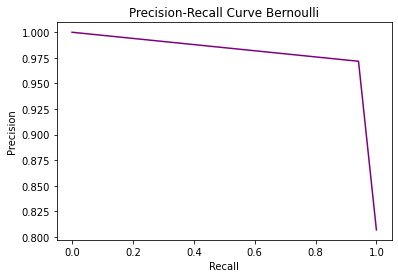

In [228]:
y_pred=model.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
precision, recall, thresholds=metrics.precision_recall_curve(y_test,y_pred)


#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve Bernoulli')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [188]:
from heapq import nlargest
from nltk.tag import pos_tag
from string import punctuation
from inspect import getsourcefile
from collections import defaultdict
from nltk.tokenize import word_tokenize
from os.path import abspath, join, dirname
from nltk.corpus import wordnet, stopwords

In [189]:
def relation_list(nouns):

    relation_list = defaultdict(list)
    
    for k in range (len(nouns)):   
        relation = []
        for syn in wordnet.synsets(nouns[k], pos = wordnet.NOUN):
            for l in syn.lemmas():
                relation.append(l.name())
                if l.antonyms():
                    relation.append(l.antonyms()[0].name())
            for l in syn.hyponyms():
                if l.hyponyms():
                    relation.append(l.hyponyms()[0].name().split('.')[0])
            for l in syn.hypernyms():
                if l.hypernyms():
                    relation.append(l.hypernyms()[0].name().split('.')[0])
        relation_list[nouns[k]].append(relation)
    return relation_list
    

In [190]:
def create_lexical_chain(nouns, relation_list):
    lexical = []
    threshold = 0.5
    for noun in nouns:
        flag = 0
        for j in range(len(lexical)):
            if flag == 0:
                for key in list(lexical[j]):
                    if key == noun and flag == 0:
                        lexical[j][noun] +=1
                        flag = 1
                    elif key in relation_list[noun][0] and flag == 0:
                        syns1 = wordnet.synsets(key, pos = wordnet.NOUN)
                        syns2 = wordnet.synsets(noun, pos = wordnet.NOUN)
                        if syns1[0].wup_similarity(syns2[0]) >= threshold:
                            lexical[j][noun] = 1
                            flag = 1
                    elif noun in relation_list[key][0] and flag == 0:
                        syns1 = wordnet.synsets(key, pos = wordnet.NOUN)
                        syns2 = wordnet.synsets(noun, pos = wordnet.NOUN)
                        if syns1[0].wup_similarity(syns2[0]) >= threshold:
                            lexical[j][noun] = 1
                            flag = 1
        if flag == 0: 
            dic_nuevo = {}
            dic_nuevo[noun] = 1
            lexical.append(dic_nuevo)
            flag = 1
    return lexical

In [191]:
def prune(lexical):
    final_chain = []
    while lexical:
        result = lexical.pop()
        if len(result.keys()) == 1:
            for value in result.values():
                if value != 1: 
                    final_chain.append(result)
        else:
            final_chain.append(result)
    return final_chain

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [192]:
lex_chains=[]
sthg=[]
for lines in data:
  tokenized = nltk.word_tokenize(lines)
  nouns=[]

  for (word, pos) in nltk.pos_tag(tokenized):
     if(pos[:2] == 'NN'):
       nouns.append(word)
  relation = relation_list(nouns)
  lex_chains.append(create_lexical_chain(nouns, relation))
  
  #final_chain = prune(lexical)
  #lex_chains.append(lexical)

In [203]:
lex_chains

[[{'home': 1},
  {'page': 1},
  {'c': 1},
  {'system': 3},
  {'practicum': 1},
  {'p': 1},
  {'birman': 1},
  {'news': 1},
  {'group': 1},
  {'course': 1},
  {'lecture': 1},
  {'note': 1},
  {'filesystem': 1},
  {'hall': 1, 'structure': 1},
  {'assignment': 1, 'homework': 1},
  {'solution': 6},
  {'ta': 1},
  {'lili': 1},
  {'phone': 3},
  {'email': 3},
  {'lilics': 1},
  {'office': 3},
  {'hour': 3},
  {'wednesday': 2},
  {'yicheng': 1},
  {'huang': 1},
  {'upson': 2},
  {'ychuangcs': 1},
  {'cornell': 2},
  {'tuesday': 1},
  {'budiu': 1},
  {'budiucs': 1},
  {'tue': 1},
  {'nov': 1}],
 [{'home': 1},
  {'page': 2},
  {'c': 1},
  {'system': 6},
  {'practicum': 1},
  {'selection': 1},
  {'display': 1},
  {'symbol': 1},
  {'correspond': 1},
  {'postcript': 2},
  {'document': 1},
  {'hand': 1},
  {'phase': 1},
  {'hoca': 3},
  {'course': 2},
  {'group': 1, 'information': 1},
  {'schedule': 1},
  {'handout': 2},
  {'gif': 1},
  {'format': 2},
  {'penne': 1},
  {'question': 1},
  {'answer':

In [85]:
lex_chains[0]

[{'cs': 1},
 {'home': 1},
 {'page': 1},
 {'system': 1, 'systems': 2},
 {'practicum': 1},
 {'p': 1},
 {'birman': 1},
 {'news': 1},
 {'group': 1},
 {'course': 1},
 {'lecture': 1},
 {'notes': 1},
 {'filesystem': 1},
 {'hall': 1, 'structure': 1},
 {'assignments': 1},
 {'homework': 5},
 {'solution': 1, 'solutions': 1},
 {'tas': 1},
 {'phone': 3},
 {'email': 3},
 {'lilics': 1},
 {'office': 3},
 {'hours': 3},
 {'yicheng': 1},
 {'huang': 1},
 {'upson': 2},
 {'ychuangcs': 1},
 {'cornell': 2},
 {'budiu': 1},
 {'budiucs': 1},
 {'tue': 1},
 {'nov': 1}]

In [205]:
lc_terms=[]
vocab_lc=[]
for l in lex_chains:
  temp=[]
  for k in l:
    for v in k.keys():
        temp.append(v)
        if v not in vocab_lc:
          vocab_lc.append(v)
  lc_terms.append(temp)      

In [206]:
len(vocab_lc)

10813

In [195]:
lc_terms[0]

['home',
 'page',
 'c',
 'system',
 'practicum',
 'p',
 'birman',
 'news',
 'group',
 'course',
 'lecture',
 'note',
 'filesystem',
 'structure',
 'hall',
 'assignment',
 'homework',
 'solution',
 'ta',
 'lili',
 'phone',
 'email',
 'lilics',
 'office',
 'hour',
 'wednesday',
 'yicheng',
 'huang',
 'upson',
 'ychuangcs',
 'cornell',
 'tuesday',
 'budiu',
 'budiucs',
 'tue',
 'nov']

In [207]:
lct=[]
cnt=0
for lines in data:
  temp=[]
  tokenized = nltk.word_tokenize(lines)
  for v in vocab_lc:
    if v in lc_terms[cnt]:
      temp.append(1)
    else:
      temp.append(0)
  lct.append(temp)
  cnt+=1


In [208]:
len(lct[0])

10813

In [230]:
from sklearn.model_selection import train_test_split
label_encoder = preprocessing.LabelEncoder()
en_label = label_encoder.fit_transform(label)
#print(end)

#pad = len(max(end, key=len))
#end= np.array([i + [0]*(pad-len(i)) for i in end])

#print(end.shape)
X_train, X_test, y_train, y_test = train_test_split(lct, en_label, test_size=0.3,random_state=109)


In [210]:
len(X_train[0])


10813

In [231]:
from sklearn.naive_bayes import BernoulliNB

#Create a Classifier
model = BernoulliNB()

# Train the model using the training sets
model.fit(X_train,y_train)


BernoulliNB()

In [233]:
import pickle
filename = '/content/drive/MyDrive/IR_A3_m/lc_gbn.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
import pickle
filename = '/content/drive/MyDrive/IR_A3_m/lc_gbn.sav'
loaded_model = pickle.load(open(filename, 'rb'))

Accuracy: 0.9177215189873418
F1: 0.9511278195488722
Precision: 0.9133574007220217
Recall: 0.9921568627450981


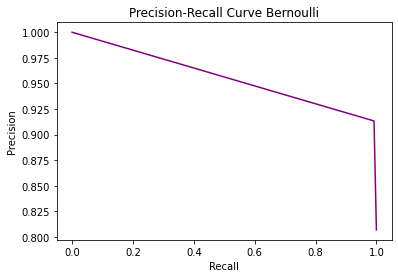

In [232]:
y_pred=model.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
precision, recall, thresholds=metrics.precision_recall_curve(y_test,y_pred)


#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve Bernoulli')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [215]:
features=tfidf_d+oc_noun+vocab_lc
features = list(dict.fromkeys(features))
len(features)

10836

In [234]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
en_label=label_encoder.fit_transform(label)
comb=[]
for lines in data:
  temp=[]
  tokenized = nltk.word_tokenize(lines)
  for v in features:
    if v in tokenized:
      temp.append(1)
    else:
      temp.append(0)
  comb.append(temp)
X_train, X_test, y_train, y_test = train_test_split(comb, en_label, test_size=0.3,random_state=109)


In [217]:
len(X_train[0])

10836

In [235]:
from sklearn.naive_bayes import BernoulliNB

#Create a Classifier
model = BernoulliNB()

# Train the model using the training sets
model.fit(X_train,y_train)


BernoulliNB()

In [237]:
import pickle
filename = '/content/drive/MyDrive/IR_A3_m/comb_gbn.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
import pickle
filename = '/content/drive/MyDrive/IR_A3_m/comb_gbn.sav'
loaded_model = pickle.load(open(filename, 'rb'))

Accuracy: 0.9208860759493671
F1: 0.9527410207939508
Precision: 0.9197080291970803
Recall: 0.9882352941176471


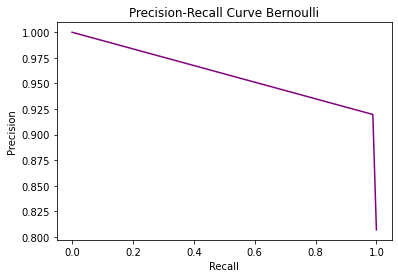

In [236]:
y_pred=model.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
precision, recall, thresholds=metrics.precision_recall_curve(y_test,y_pred)


#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve Bernoulli')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()